Big Mart Sales

Importing all the dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [4]:
big_mart=pd.read_csv('/content/Train (1).csv')

Displaying data

In [5]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
big_mart.shape

(8523, 12)

In [7]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Finding Missing Values

In [8]:
big_mart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Filling missing values

In [9]:
big_mart['Item_Weight'].mean()

12.857645184135976

In [10]:
big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(),inplace= True)

In [11]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
mode_of_outlet_size=big_mart.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [13]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [14]:
missing_values=big_mart['Outlet_Size'].isnull()

In [15]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [16]:
big_mart.loc[missing_values,'Outlet_Size']=big_mart.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [17]:
print(big_mart)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [18]:
big_mart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [19]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data Distribution

In [20]:
sns.set()

<ipython-input-21-f20f43fe99af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_Weight'])


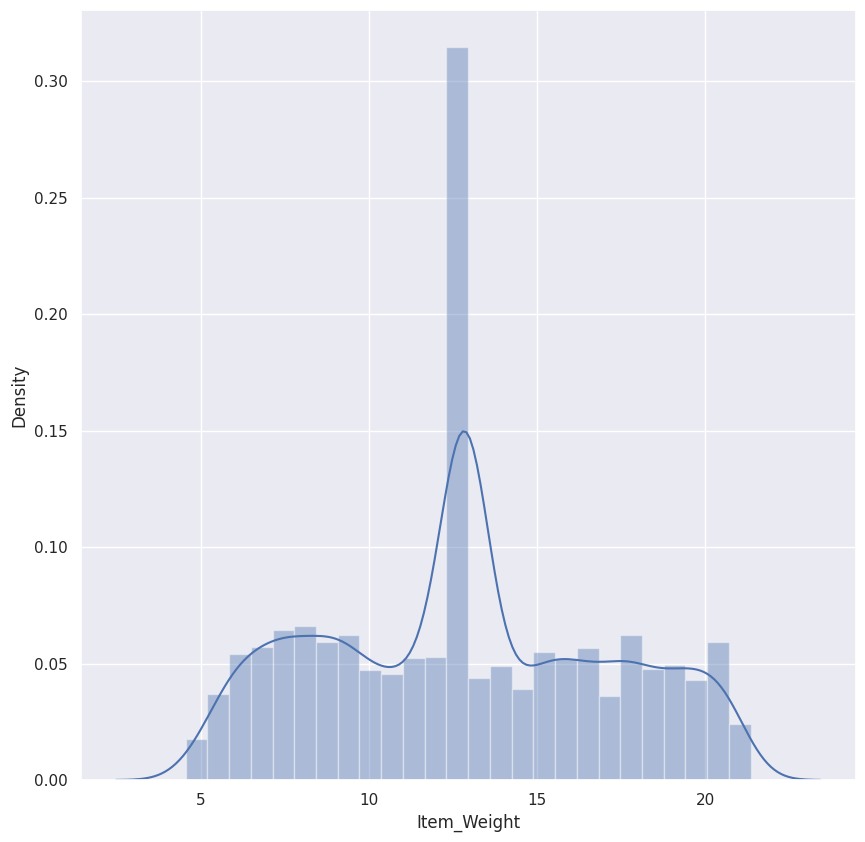

In [21]:
#Item weight column
plt.figure(figsize=(10,10))
sns.distplot(big_mart['Item_Weight'])
plt.show()

<ipython-input-22-eb5c40197db6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_Visibility'])


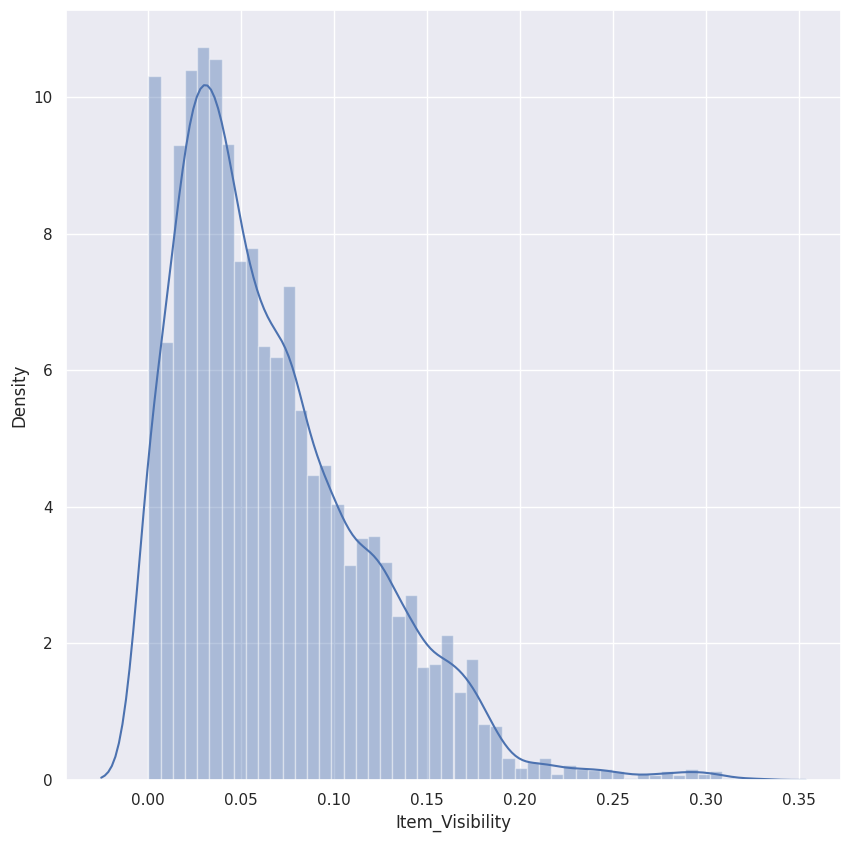

In [22]:
#Item Visibility Column
plt.figure(figsize=(10,10))
sns.distplot(big_mart['Item_Visibility'])
plt.show()

<ipython-input-23-7d57d6742e8a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_MRP'])


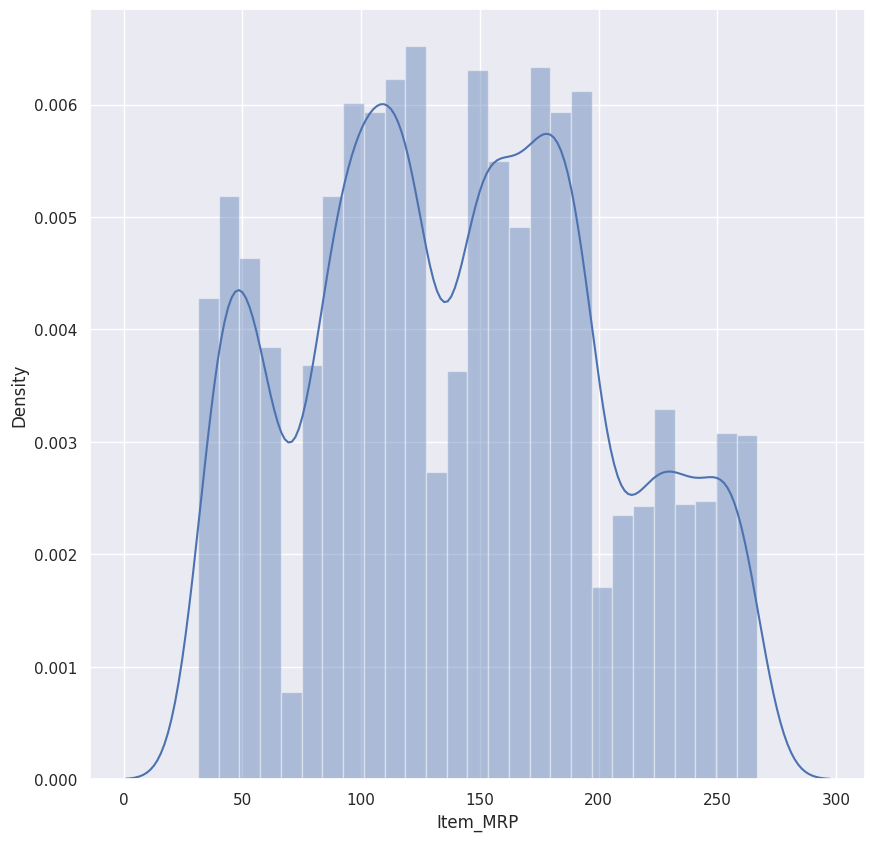

In [23]:
#Item MRP Column
plt.figure(figsize=(10,10))
sns.distplot(big_mart['Item_MRP'])
plt.show()

<ipython-input-24-ef9de3bf512b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_Outlet_Sales'])


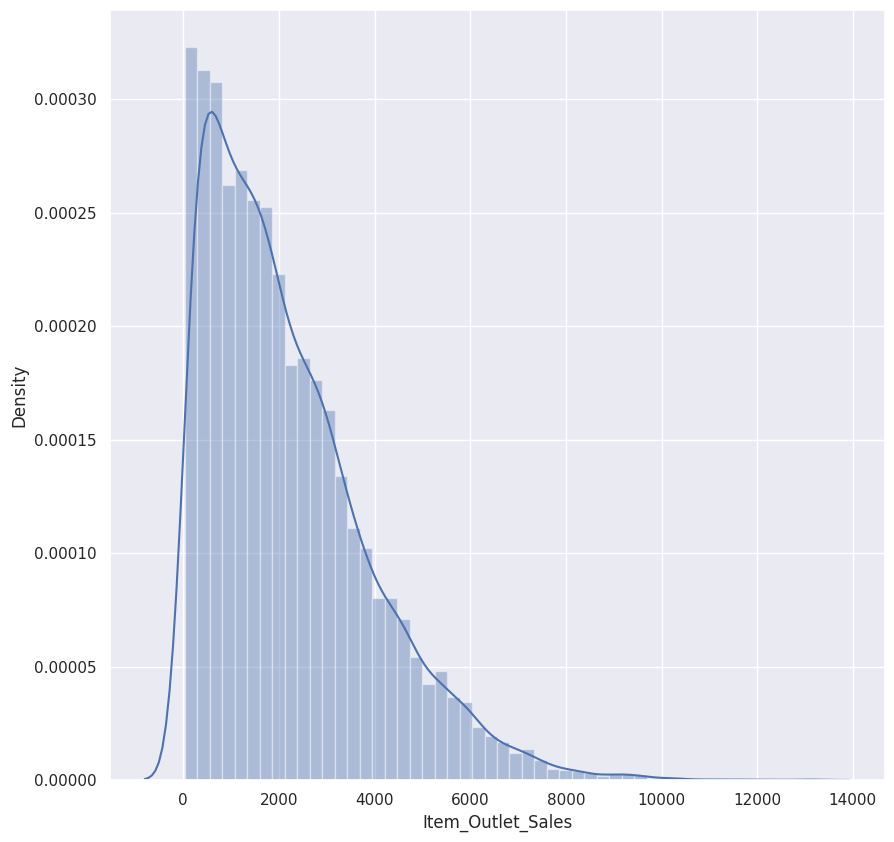

In [24]:
#Item Outlet Sales
plt.figure(figsize=(10,10))
sns.distplot(big_mart['Item_Outlet_Sales'])
plt.show()

Countplots

<ipython-input-25-b060319d47ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Establishment_Year',data=big_mart,palette=['red','blue','green','yellow'])
<ipython-input-25-b060319d47ce>:2: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Outlet_Establishment_Year',data=big_mart,palette=['red','blue','green','yellow'])


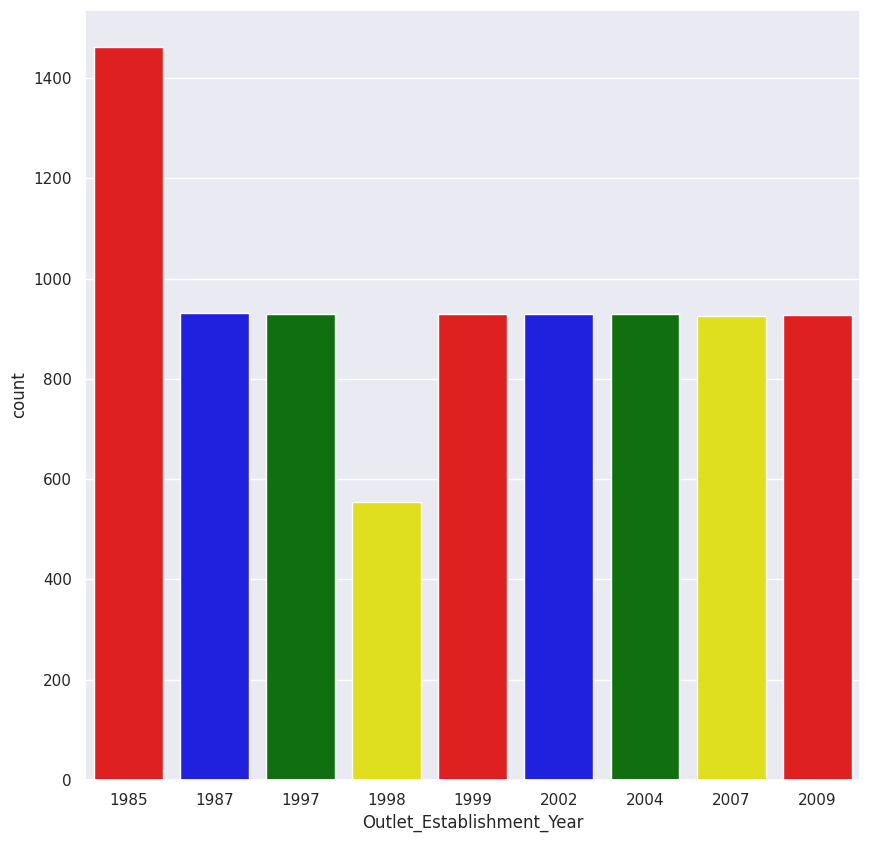

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart,palette=['red','blue','green','yellow'])
plt.show()

<ipython-input-26-2db051c177b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content',data=big_mart,palette=['red','blue','green','yellow'])
<ipython-input-26-2db051c177b6>:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Item_Fat_Content',data=big_mart,palette=['red','blue','green','yellow'])


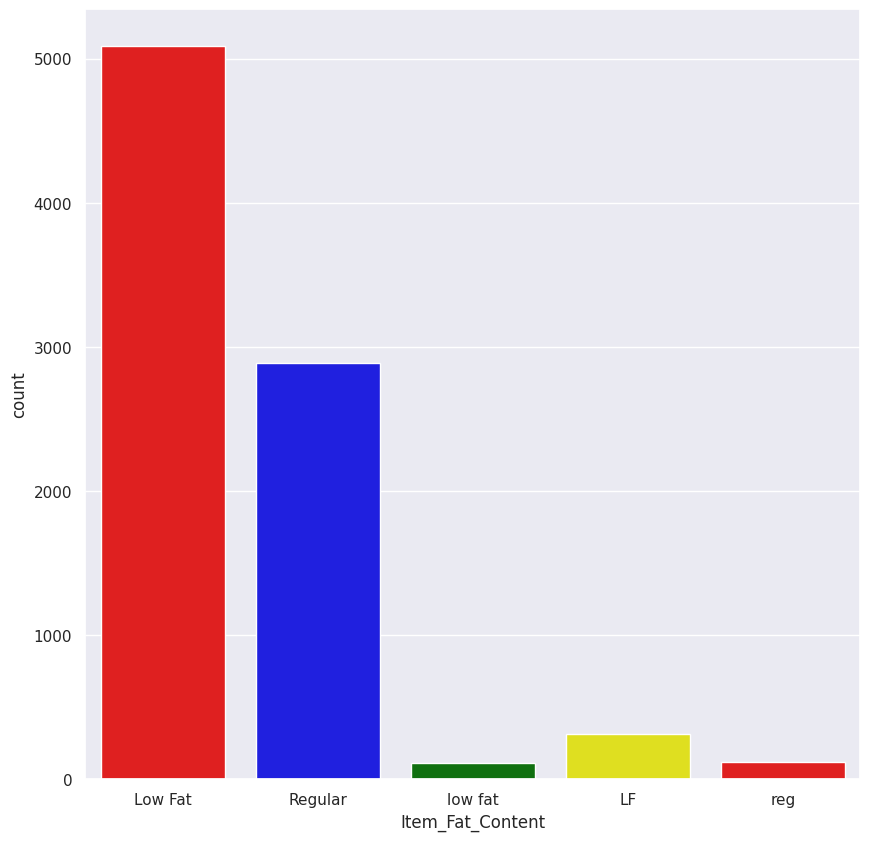

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(x='Item_Fat_Content',data=big_mart,palette=['red','blue','green','yellow'])
plt.show()

<ipython-input-27-00e61ee5b756>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type',data=big_mart,palette=['red','blue','green','yellow'])
<ipython-input-27-00e61ee5b756>:2: UserWarning: 
The palette list has fewer values (4) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Item_Type',data=big_mart,palette=['red','blue','green','yellow'])


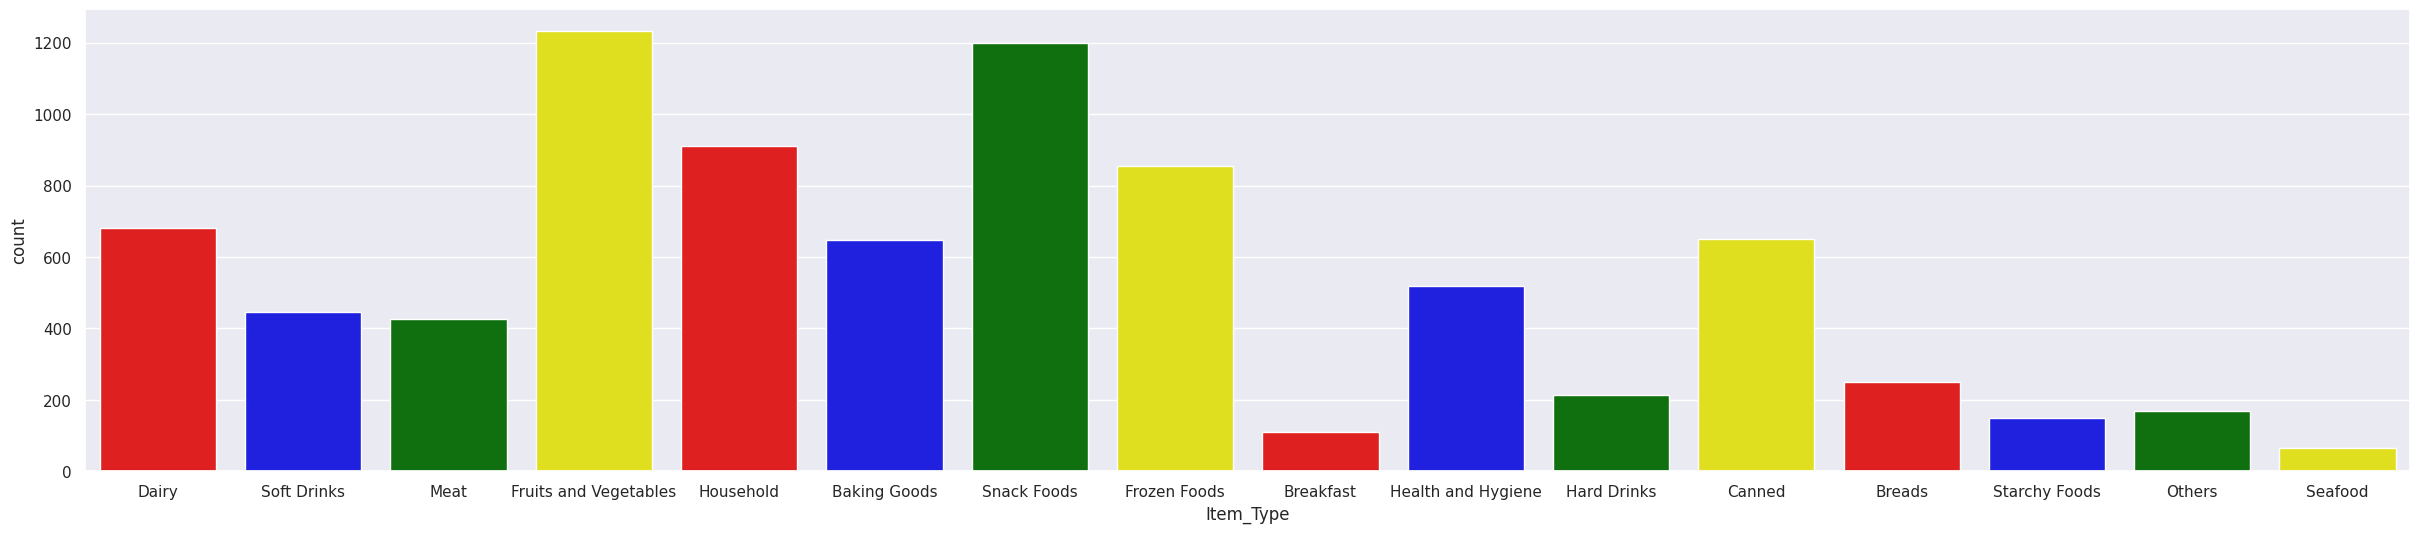

In [27]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart,palette=['red','blue','green','yellow'])
plt.show()

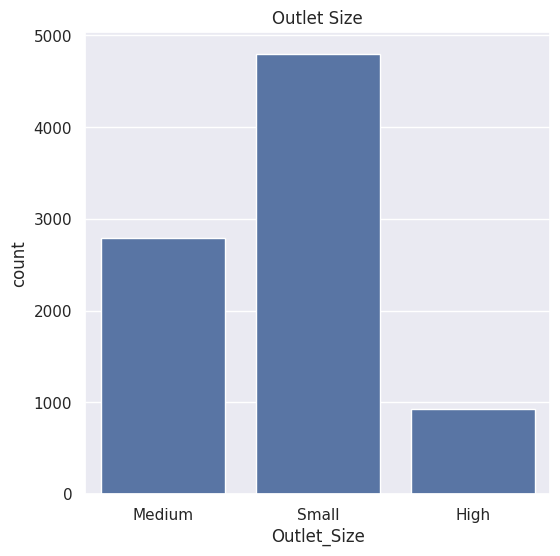

In [28]:

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=big_mart)
plt.title("Outlet Size")
plt.show()

In [29]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
big_mart['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [31]:
big_mart.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
big_mart['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding

In [71]:
le=LabelEncoder()

In [72]:
big_mart['Item_Identifier']=le.fit_transform(big_mart['Item_Identifier'])

In [73]:
big_mart['Item_Fat_Content']=le.fit_transform(big_mart['Item_Fat_Content'])

In [74]:
big_mart['Item_Type']=le.fit_transform(big_mart['Item_Type'])

In [75]:
big_mart['Outlet_Identifier']=le.fit_transform(big_mart['Outlet_Identifier'])

In [77]:
big_mart['Outlet_Size']=le.fit_transform(big_mart['Outlet_Size'])

In [78]:
big_mart['Outlet_Location_Type']=le.fit_transform(big_mart['Outlet_Location_Type'])

In [79]:
big_mart['Outlet_Type']=le.fit_transform(big_mart['Outlet_Type'])

In [80]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting into features and target

In [81]:
x=big_mart.drop(columns='Item_Outlet_Sales', axis=1)
y=big_mart['Item_Outlet_Sales']

In [82]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [83]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Performing Train Test Split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [86]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [87]:
print(y.shape,y_train.shape,y_test.shape)

(8523,) (6818,) (1705,)


In [88]:
y_train.head()

,Item_Outlet_Sales
7173,1662.5026
3315,2956.1520
5932,2490.0920
7872,988.7130
5946,45.9402


Creating instance

In [89]:
#Manually replacing the default values with our desired value,these value control the performance of our model
regressor1=XGBRegressor(
    base_score=0.5,
    max_depth=3,
    booster='gbtree',
    gamma=0,
    n_estimators=100,nthread=None,random_state=0,
    max_delta_step=0,
    min_child_weight=1,
    learning_rate=0.1,
    importance_type='gain',
    subsample=1,silent=None,
    verbosity=1,
    colsample_bynode=1,colsample_bytree=1,colsample_bylevel=1
)

In [90]:
regressor1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, nthread=None, num_parallel_tree=None, ...)

In [91]:
training_prediction=regressor1.predict(x_train)

In [92]:
r2_squared=metrics.r2_score(y_train,training_prediction)
print(r2_squared)

0.6336803512975848


In [93]:
test_prediction=regressor1.predict(x_test)

In [94]:
r2_squared=metrics.r2_score(y_test,test_prediction)
print(r2_squared)

0.5899217610726417


Result=The R² value, also known as the coefficient of determination, is a statistical measure used to assess how well a regression model explains the variance in the dependent variable. In simple terms, it tells you how well the independent variables in a model predict the dependent variable.
General interpretation of R2 value:
R² = 1.0(Perfectly Fit)
0.75 ≤ R² < 1.0(Very good fit)
0.5 ≤ R² < 0.75(Good Fit)
Our data lies in the  range of good fit.The model explains 50% to 75% of the variance. This is often considered good in many applied fields, such as social sciences, economics, and biology, where data can be noisy or influenced by many factors.